In [1]:
# https://www.youtube.com/watch?v=N8DOiFDsDuE&list=PLxgDUj5eygKnSd4MYHIuAC7E3VEPm_WLO&index=24
# superpowered version of numpy adding more functionality on top of it

In [2]:
# - extends statistical capabilities of numpy
# - multivariate normal distribution
# - special probability function
# - convolution (fundamential operation in DL, computer vision, signal processing, statistics)

In [3]:
# https://www.youtube.com/watch?v=N8DOiFDsDuE&list=PLxgDUj5eygKnSd4MYHIuAC7E3VEPm_WLO&index=25
# PDF and CDF under normal distribution

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
x = np.linspace(-6, 6, 1_000)
fx = norm.pdf(x, loc=0, scale=1)

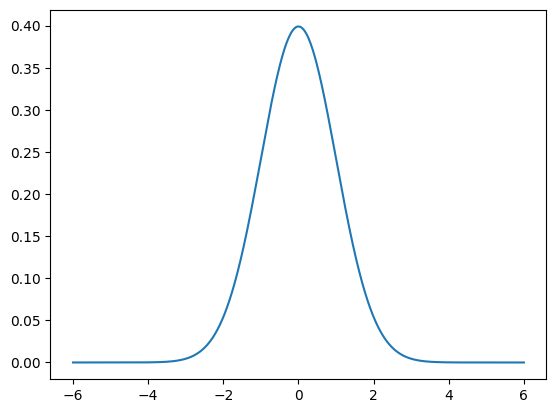

In [6]:
plt.plot(x, fx)
plt.show()

In [7]:
Fx = norm.cdf(x, loc=0, scale=1)

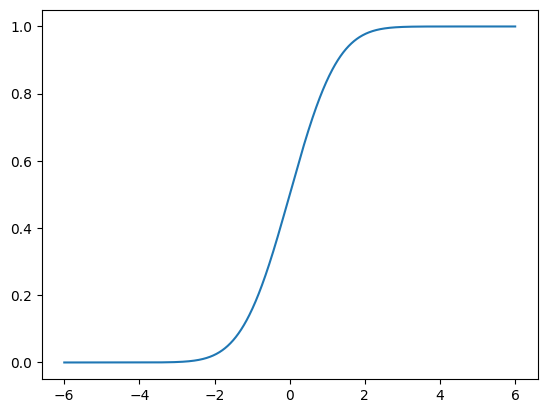

In [8]:
plt.plot(x, Fx)
plt.show()

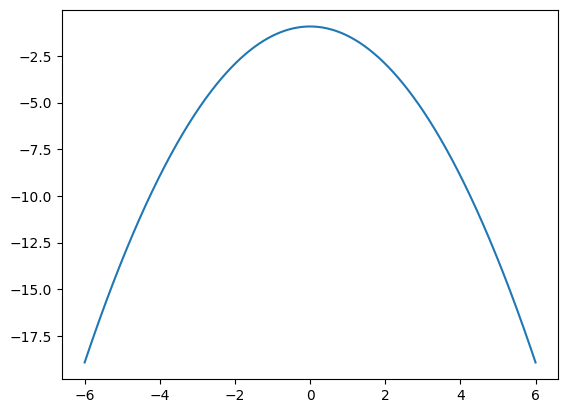

In [9]:
logfx = norm.logpdf(x, loc=0, scale=1)
plt.plot(x, logfx)
plt.show();

In [10]:
# https://www.youtube.com/watch?v=N8DOiFDsDuE&list=PLxgDUj5eygKnSd4MYHIuAC7E3VEPm_WLO&index=26
# CONVOLUTION

In [11]:
from PIL import Image

In [12]:
!wget https://upload.wikimedia.org/wikipedia/en/a/a6/Pokémon_Pikachu_art.png
!mv Pokémon_Pikachu_art.png download.png

--2021-08-26 14:19:03--  https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png
Risoluzione di upload.wikimedia.org (upload.wikimedia.org)... 2620:0:862:ed1a::2:b, 91.198.174.208
Connessione a upload.wikimedia.org (upload.wikimedia.org)|2620:0:862:ed1a::2:b|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 53612 (52K) [image/png]
Salvataggio in: «Pokémon_Pikachu_art.png»

Pokémon_Pikachu_art 100%[===================>]  52,36K  --.-KB/s    in 0,05s   

2021-08-26 14:19:03 (1011 KB/s) - «Pokémon_Pikachu_art.png» salvato [53612/53612]



In [13]:
im = Image.open('download.png')

In [14]:
grey = np.mean(im, axis=2)

In [15]:
# 2d Gaussian filter
x = np.linspace(-6, 6, 50)
fx = norm.pdf(x, loc=0, scale=1)

$$
K(x_1, x_2) = c e^{-\frac{1}{2\sigma^2}x_1^2}e^{-\frac{1}{2\sigma^2}x_2^2}
$$

In [16]:
filt = np.outer(fx, fx)

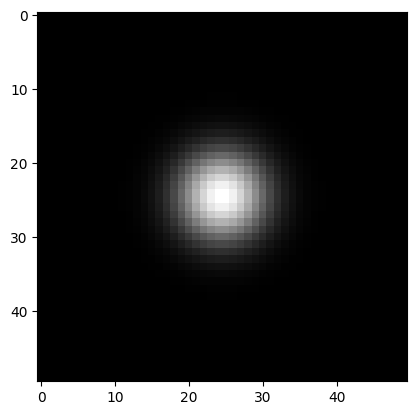

In [18]:
plt.imshow(filt, cmap='gray')
plt.show()

In [19]:
from scipy.signal import convolve2d

In [21]:
out = convolve2d(grey, filt)

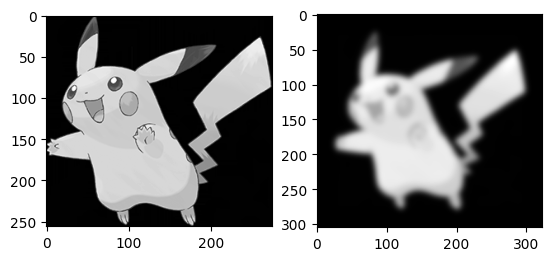

In [23]:
plt.subplot(1,2,1)
# 1 by 2 grid of plots, we'll fill the first position
plt.imshow(grey, cmap='gray')
plt.subplot(1,2,2)
# 1 by 2 grid of plots, we'll fill the second position
plt.imshow(out, cmap='gray')
plt.show()

In [24]:
# https://www.youtube.com/watch?v=N8DOiFDsDuE&list=PLxgDUj5eygKnSd4MYHIuAC7E3VEPm_WLO&index=27
# SCIPY EXERCISE

* Implement edge detection
* Steps
    1. convolve $H_X$ and $X_Y$ with greyscale image to obtain $G_X$ and $G_Y$
    2. take $G = \sqrt{G_X^2 + G_Y^2}$ (this is the edge-detected output)

$$
H_X = \begin{pmatrix}
    1 & 0 & -1\\
    2 & 0 & -2\\
    1 & 0 & -1
    \end{pmatrix}\\
H_Y = \begin{pmatrix}
    1  & 2  & 1\\
    0  & 0  & 0\\
    -1 & -2 & -1
    \end{pmatrix} = H_X^T\\
G_X = H_X*A\\
G_Y = H_Y*A\\
G = \sqrt{G_X^2 + G_y^2}
$$
where $*$ means convolution